In [1]:
import pandas as pd
import numpy as np

In [2]:
#import the original dataset
data = pd.read_csv("training_data.csv")
data.head(5)

,cases,county,deaths,Day,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,politics_democratic_love_jaccard,...,religion_jaccard,health_jaccard,politics_republican_love_jaccard,health_technology_jaccard,politics_democratic_hate_jaccard,domestic_jaccard,illness_jaccard,ideology_jaccard,education_jaccard,gender_jaccard
0,0,Richland,0,10,0.000000,0.00000,0.000000,0.000011,0.000151,0.000053,...,0.000000,0.0,0.000125,0.0,0.0,0.000047,0.00000,0.0,0.000000,0.0
1,119,Lawrence,0,105,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000195,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0
2,49,Wayne,0,90,0.000076,0.00037,0.006502,0.000039,0.000000,0.000000,...,0.000018,0.0,0.000000,0.0,0.0,0.000067,0.00005,0.0,0.000022,0.0
3,7,Fayette,0,85,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0
4,0,Trumbull,0,7,0.000000,0.00000,0.000000,0.000046,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000038,0.00000,0.0,0.000000,0.0


In [3]:
#separating the target variable and predictor variable
X = data.iloc[:,1:]
X['county'] = pd.Series(X['county'],dtype = "category")#[1]  #change the type of "county" variable to category(Preparation for LightGBM) 
y = data.iloc[:,:1]

#### Reference: [1] Rajan Lagah Lightgbm for regression with categorical data. Retrived from https://medium.com/analytics-vidhya/lightgbm-for-regression-with-categorical-data-b08eaff501d1

C:\Users\叶濮华\AppData\Roaming\Python\Python39\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\叶濮华\AppData\Roaming\Python\Python39\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\叶濮华\AppData\Roaming\Python\Python39\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000905 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4239
[LightGBM] [Info] Number of data points in the train set: 2512, number of used features: 26
[LightGBM] [Info] Start training from score 161.242436
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's rmse: 870.284	valid_1's rmse: 853.637
Training until validation scores don't improve for 500 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	training's rmse: 867.949	valid_1's rmse: 851.18
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	training's rmse: 865.704	valid_1's rmse: 848.82
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	training's rmse: 863.722	valid_1's rmse: 846.481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	tra

[2]

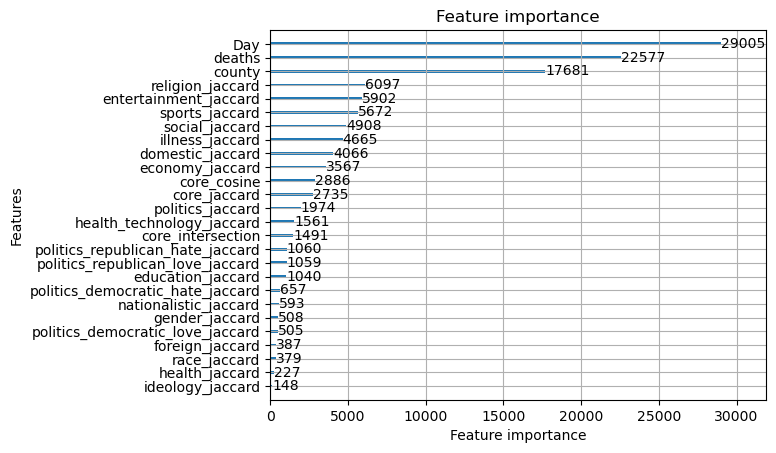

In [4]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from lightgbm import plot_importance

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

params = {
    'learning_rate': 0.005,
    'max_depth':4,
    'num_leaves':16,
    'metrics':'rmse',
    'subsample':0.8,
    'bagging_freq':1,
    'feature_fraction':0.8
}

train = lgb.Dataset(X_train,y_train)
valid = lgb.Dataset(X_test,y_test)
num_rounds = 500000

gbm = lgb.train(params,train,num_rounds,valid_sets=[train,valid],early_stopping_rounds=500)
y_pred = gbm.predict(X_test)

print("mse:",mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

plot_importance(gbm)
plt.show
[2]

#### Reference: [2] VarableX LightGBM 重要参数、方法、函数理解及调参思路、网格搜索. Retrived from https://blog.csdn.net/VariableX/article/details/107256149

In [5]:
#import test data set
X = pd.read_csv("test_data.csv")
day = X["day"]  # preparation for deal with the final predictions 
X.head(5)

,county,deaths,day,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,politics_democratic_love_jaccard,nationalistic_jaccard,...,religion_jaccard,health_jaccard,politics_republican_love_jaccard,health_technology_jaccard,politics_democratic_hate_jaccard,domestic_jaccard,illness_jaccard,ideology_jaccard,education_jaccard,gender_jaccard
0,Carroll,0,22,0.000000,0.000000,0.000000,0.000106,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,Richland,3,118,0.000661,0.002567,0.058824,0.000494,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000516,0.000000,0.000000,0.000442,0.0,0.000000,0.000000
2,Portage,0,51,0.000000,0.000000,0.000000,0.000013,0.000009,0.000036,0.000000,...,0.000089,0.0,0.000000,0.000000,0.000191,0.000000,0.000000,0.0,0.000000,0.000022
3,Auglaize,0,27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,Montgomery,0,8,0.000005,0.000036,0.000462,0.000043,0.000033,0.000015,0.000014,...,0.000018,0.0,0.000056,0.000004,0.000000,0.000082,0.000004,0.0,0.000012,0.000017


In [6]:
X = X.iloc[:,:]
X['county'] = pd.Series(X['county'],dtype = "category")

In [7]:
y_predicted = gbm.predict(X)

In [8]:
#change the numer of case before day70 to 0
for i in range(len(y_predicted)):
    if day[i] < 70:
        y_predicted[i] = 0

In [9]:
Y = pd.DataFrame(y_predicted)
Y.to_csv("result.csv")